Data acquisition, cleaning, an exploration

1) gather app urls
2) gather full data for each url and append to csv

In [24]:
import pandas as pd
import csv
from google_play_scraper import app
from google_play_scraper import search

In [119]:
urls = pd.read_csv('url1.csv')
print(urls.head())

#check for duplicates in urls app_id before dropping them

duplicate_rows = urls[urls['appid'].duplicated()]
print(duplicate_rows)

num_duplicates = urls['appid'].duplicated().sum()
print(f"Number of duplicates in 'addid': {num_duplicates}")

#drop duplicates in urls app_id
urls = urls.drop_duplicates(subset='appid', keep='first')



                       appid
0    com.king.candycrushsaga
1          com.roblox.client
2    com.vincentb.MobControl
3       com.kiloo.subwaysurf
4  com.JindoBlu.OfflineGames
                            appid
191  com.google.android.apps.bard
Number of duplicates in 'addid': 1


In [120]:
# initialize an empty list to store results
results = []
# Loop through the URLs in urls DataFrame
for i in range(len(urls)):
    n = urls.iloc[i,0] 
    result = app(
        n,
        lang='en', # defaults to 'en'
        country='us' # defaults to 'us'
    )
    # print(result) 
    # save the result to a list of dictionaries
    results.append(result)
    
# Take some keys from results and put them in a csv file
keys = ['title', 'description', 'descriptionHTML', 'summary', 'realInstalls', 'score', 'ratings', 'reviews', 'price', 'free', 'currency', 'sale', 'saleTime', 'originalPrice', 'saleText', 'offersIAP', 'inAppProductPrice', 'genre', 'genreId', 'categories', 'contentRating', 'contentRatingDescription', 'adSupported', 'containsAds', 'released', 'lastUpdatedOn', 'version']
# Create a DataFrame from the results
df = pd.DataFrame(results, columns=keys)


In [121]:
df.head()

,title,description,descriptionHTML,summary,realInstalls,score,ratings,reviews,price,free,...,genre,genreId,categories,contentRating,contentRatingDescription,adSupported,containsAds,released,lastUpdatedOn,version
0,Candy Crush Saga,Explore a world full of delicious match-3 puzz...,Explore a world full of delicious match-3 puzz...,Match your way through candy puzzles packed wi...,1974480219,4.618176,38834040.0,2109270.0,0.0,True,...,Casual,GAME_CASUAL,"[{'name': 'Puzzle', 'id': 'GAME_PUZZLE'}, {'na...",Everyone,None,True,True,"Nov 15, 2012","Jun 12, 2025",1.305.0.1
1,Roblox,Roblox is the ultimate virtual universe that l...,Roblox is the ultimate virtual universe that l...,Your next adventure awaits.,1252864778,4.462343,43720501.0,3520743.0,0.0,True,...,Adventure,GAME_ADVENTURE,"[{'name': 'Simulation', 'id': 'GAME_SIMULATION...",Teen,Diverse Content: Discretion Advised,False,False,"Jul 15, 2014","Jun 26, 2025",2.678.751
2,Mob Control,"🌟 Lead, Multiply, and Conquer! Mob Control del...","🌟 Lead, Multiply, and Conquer! Mob Control del...","Join Mob Control: Grow your army, lead your mo...",180814603,4.164065,717423.0,35391.0,0.0,True,...,Arcade,GAME_ARCADE,"[{'name': 'Action', 'id': 'GAME_ACTION'}, {'na...",Everyone,Mild Fantasy Violence,False,False,"Apr 29, 2021","Jun 25, 2025",2.89.3
3,Subway Surfers,DASH as fast as you can! \r\nDODGE the oncomin...,DASH as fast as you can! <br>DODGE the oncomin...,"Help Jake, Tricky & Fresh escape from the grum...",2630557369,4.559105,42025857.0,1792287.0,0.0,True,...,Arcade,GAME_ARCADE,"[{'name': 'Action', 'id': 'GAME_ACTION'}, {'na...",Everyone 10+,Fantasy Violence,True,True,"Sep 20, 2012","Jun 23, 2025",3.48.2
4,Offline Games - No Wifi Games,Get ready for 'Offline Games': fun for all age...,Get ready for &#39;Offline Games&#39;: fun for...,Choose from lots of puzzles and minigames to p...,138333421,4.713331,302139.0,9428.0,0.0,True,...,Casual,GAME_CASUAL,"[{'name': 'Casual', 'id': 'GAME_CASUAL'}, {'na...",Everyone,None,True,True,"Aug 4, 2023","May 22, 2025",3.1.2


In [122]:
df.shape




(315, 27)

In [123]:
# Check for missing values
print(df.isnull().sum())    

title                         0
description                   0
descriptionHTML               0
summary                       0
realInstalls                  0
score                        23
ratings                      23
reviews                      23
price                         0
free                          0
currency                      0
sale                          0
saleTime                    315
originalPrice               315
saleText                    315
offersIAP                     0
inAppProductPrice           126
genre                         0
genreId                       0
categories                    0
contentRating                 0
contentRatingDescription    267
adSupported                   0
containsAds                   0
released                      4
lastUpdatedOn                 0
version                       0
dtype: int64


In [124]:
# make a copy of the DataFrame 
df_copy = df.copy()

In [134]:
df_copy.head()

,title,description,descriptionHTML,summary,realInstalls,score,ratings,reviews,price,free,...,genre,genreId,categories,contentRating,contentRatingDescription,adSupported,containsAds,released,lastUpdatedOn,version
0,Candy Crush Saga,Explore a world full of delicious match-3 puzz...,Explore a world full of delicious match-3 puzz...,Match your way through candy puzzles packed wi...,1974480219,4.618176,38834040.0,2109270.0,0.0,True,...,Casual,GAME_CASUAL,"[{'name': 'Puzzle', 'id': 'GAME_PUZZLE'}, {'na...",Everyone,None,True,True,"Nov 15, 2012","Jun 12, 2025",1.305.0.1
1,Roblox,Roblox is the ultimate virtual universe that l...,Roblox is the ultimate virtual universe that l...,Your next adventure awaits.,1252864778,4.462343,43720501.0,3520743.0,0.0,True,...,Adventure,GAME_ADVENTURE,"[{'name': 'Simulation', 'id': 'GAME_SIMULATION...",Teen,Diverse Content: Discretion Advised,False,False,"Jul 15, 2014","Jun 26, 2025",2.678.751
2,Mob Control,"🌟 Lead, Multiply, and Conquer! Mob Control del...","🌟 Lead, Multiply, and Conquer! Mob Control del...","Join Mob Control: Grow your army, lead your mo...",180814603,4.164065,717423.0,35391.0,0.0,True,...,Arcade,GAME_ARCADE,"[{'name': 'Action', 'id': 'GAME_ACTION'}, {'na...",Everyone,Mild Fantasy Violence,False,False,"Apr 29, 2021","Jun 25, 2025",2.89.3
3,Subway Surfers,DASH as fast as you can! \r\nDODGE the oncomin...,DASH as fast as you can! <br>DODGE the oncomin...,"Help Jake, Tricky & Fresh escape from the grum...",2630557369,4.559105,42025857.0,1792287.0,0.0,True,...,Arcade,GAME_ARCADE,"[{'name': 'Action', 'id': 'GAME_ACTION'}, {'na...",Everyone 10+,Fantasy Violence,True,True,"Sep 20, 2012","Jun 23, 2025",3.48.2
4,Offline Games - No Wifi Games,Get ready for 'Offline Games': fun for all age...,Get ready for &#39;Offline Games&#39;: fun for...,Choose from lots of puzzles and minigames to p...,138333421,4.713331,302139.0,9428.0,0.0,True,...,Casual,GAME_CASUAL,"[{'name': 'Casual', 'id': 'GAME_CASUAL'}, {'na...",Everyone,None,True,True,"Aug 4, 2023","May 22, 2025",3.1.2


In [147]:
df = df_copy.copy()

In [148]:
# remove the columns that are empty - saleTime, originalPrice, saleText 
df = df.drop(columns=['saleTime', 'originalPrice', 'saleText'])

# show unique values in the contentRatingDescription column
print(df['contentRatingDescription'].unique())

# check the contentRating value for rows where contentRatingDescription is null and get the count of unique values
print(df[df['contentRatingDescription'].isnull()]['contentRating'].value_counts())

# use the contentRating column to fill the null values in the contentRatingDescription column
df['contentRatingDescription'] = df['contentRatingDescription'].fillna(df['contentRating'])

# check the contentRatingDescription value for rows where contentRating is null and get the count of unique values
print(df[df['contentRating'].isnull()]['contentRatingDescription'].value_counts())  

   

[None 'Diverse Content: Discretion Advised' 'Mild Fantasy Violence'
 'Fantasy Violence' 'Mild Fantasy Violence, Crude Humor'
 'Fantasy Violence, Mild Blood' 'Mild Violence'
 'Drug Reference, Violence, Blood' 'Comic Mischief' 'Blood, Violence'
 'Violence, Blood' 'Use of Alcohol and Tobacco'
 'Sexual Themes, Nudity, Strong Language' 'Sexual Themes'
 'Violence, Sexual Themes, Use of Drugs and Alcohol, Strong Language, Crude Humor'
 'Alcohol Reference' 'Use of Alcohol' 'Language']
contentRating
Everyone        243
Teen             19
Mature 17+        4
Everyone 10+      1
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


In [149]:
# replace missing values in the score, ratings, and reviews columns with 0
df['score'] = df['score'].fillna(0)
df['ratings'] = df['ratings'].fillna(0)
df['reviews'] = df['reviews'].fillna(0) 

In [150]:
# Check for missing values
print(df.isnull().sum())

# summarize the inAppProductPrice column
print(df['inAppProductPrice'].describe())

title                         0
description                   0
descriptionHTML               0
summary                       0
realInstalls                  0
score                         0
ratings                       0
reviews                       0
price                         0
free                          0
currency                      0
sale                          0
offersIAP                     0
inAppProductPrice           126
genre                         0
genreId                       0
categories                    0
contentRating                 0
contentRatingDescription      0
adSupported                   0
containsAds                   0
released                      4
lastUpdatedOn                 0
version                       0
dtype: int64
count                         189
unique                        144
top       $0.99 - $99.99 per item
freq                           10
Name: inAppProductPrice, dtype: object


In [151]:
# show all unique values in the inAppProductPrice column
print(df['inAppProductPrice'].unique())

# first strip 'per item' from the inAppProductPrice column
df['inAppProductPrice'] = df['inAppProductPrice'].str.replace(' per item', '', regex=False) 

# show all unique values in the inAppProductPrice column
print(df['inAppProductPrice'].unique())

# split the inAppProductPrice column into two columns - minInAppProductPrice and maxInAppProductPrice
df[['minInAppProductPrice', 'maxInAppProductPrice']] = df['inAppProductPrice'].str.split(' - ', expand=True)      

['$0.99 - $149.99 per item' '$0.50 - $199.99 per item'
 '$0.84 - $399.99 per item' '$0.99 - $99.99 per item'
 '$1.99 - $10.99 per item' '$0.99 - $49.99 per item'
 '$0.99 - $9.99 per item' '$0.99 - $24.99 per item'
 '$0.10 - $299.99 per item' '$0.29 - $99.99 per item'
 '$1.99 - $69.99 per item' '$0.99 - $179.99 per item'
 '$4.99 - $49.99 per item' '$0.99 - $224.99 per item' '$9.99 per item'
 None '$0.49 - $29.99 per item' '$0.09 - $109.99 per item'
 '$0.99 - $249.99 per item' '$0.99 - $199.99 per item'
 '$0.99 - $299.99 per item' '$0.39 - $99.99 per item'
 '$0.49 - $172.99 per item' '$0.29 - $239.99 per item' '$1.99 per item'
 '$0.99 - $129.99 per item' '$0.99 - $19.99 per item'
 '$19.99 - $200.00 per item' '$0.99 - $21.99 per item'
 '$1.99 - $129.99 per item' '$0.49 - $129.99 per item'
 '$0.99 - $1,024.00 per item' '$1.99 - $9.99 per item'
 '$0.99 - $47.99 per item' '$19.00 - $390.00 per item'
 '$1.00 - $129.99 per item' '$4.99 - $199.99 per item'
 '$0.49 - $399.99 per item' '$9.99 - $

In [152]:
#show the minInAppProductPrice and maxInAppProductPrice columns
print(df[['minInAppProductPrice', 'maxInAppProductPrice']].head(50))

# where minInAppProductPrice is null, fill it with 0
df['minInAppProductPrice'] = df['minInAppProductPrice'].fillna(0)


   minInAppProductPrice maxInAppProductPrice
0                 $0.99              $149.99
1                 $0.50              $199.99
2                 $0.84              $399.99
3                 $0.99               $99.99
4                 $1.99               $10.99
5                 $0.99               $49.99
6                 $0.99                $9.99
7                 $0.99               $24.99
8                 $0.10              $299.99
9                 $0.29               $99.99
10                $1.99               $69.99
11                $0.99              $179.99
12                $4.99               $49.99
13                $0.99              $224.99
14                $9.99                 None
15                 None                 None
16                $0.49               $29.99
17                $0.09              $109.99
18                $0.99              $249.99
19                $0.99              $199.99
20                $0.99              $299.99
21        

In [154]:
#show the minInAppProductPrice and maxInAppProductPrice columns
print(df[['minInAppProductPrice', 'maxInAppProductPrice']].head(50))

# strip the $ sign from the minInAppProductPrice and maxInAppProductPrice columns
df['minInAppProductPrice'] = df['minInAppProductPrice'].str.replace('$', '', regex=False)
df['maxInAppProductPrice'] = df['maxInAppProductPrice'].str.replace('$', '', regex=False)

#show the minInAppProductPrice and maxInAppProductPrice columns
print(df[['minInAppProductPrice', 'maxInAppProductPrice']].head(50))

   minInAppProductPrice maxInAppProductPrice
0                 $0.99              $149.99
1                 $0.50              $199.99
2                 $0.84              $399.99
3                 $0.99               $99.99
4                 $1.99               $10.99
5                 $0.99               $49.99
6                 $0.99                $9.99
7                 $0.99               $24.99
8                 $0.10              $299.99
9                 $0.29               $99.99
10                $1.99               $69.99
11                $0.99              $179.99
12                $4.99               $49.99
13                $0.99              $224.99
14                $9.99                 None
15                    0                 None
16                $0.49               $29.99
17                $0.09              $109.99
18                $0.99              $249.99
19                $0.99              $199.99
20                $0.99              $299.99
21        

In [155]:
# convert the NaN values in the minInAppProductPrice to 0
df['minInAppProductPrice'] = pd.to_numeric(df['minInAppProductPrice'], errors='coerce').fillna(0)   

#show the minInAppProductPrice and maxInAppProductPrice columns
print(df[['minInAppProductPrice', 'maxInAppProductPrice']].head(50))

    minInAppProductPrice maxInAppProductPrice
0                   0.99               149.99
1                   0.50               199.99
2                   0.84               399.99
3                   0.99                99.99
4                   1.99                10.99
5                   0.99                49.99
6                   0.99                 9.99
7                   0.99                24.99
8                   0.10               299.99
9                   0.29                99.99
10                  1.99                69.99
11                  0.99               179.99
12                  4.99                49.99
13                  0.99               224.99
14                  9.99                 None
15                  0.00                 None
16                  0.49                29.99
17                  0.09               109.99
18                  0.99               249.99
19                  0.99               199.99
20                  0.99          

In [156]:
df2 = df.copy()

In [157]:
# where the maxInAppProductPrice is null, fill it with the minInAppProductPrice
df['maxInAppProductPrice'] = df['maxInAppProductPrice'].fillna(df['minInAppProductPrice'])  

#show the minInAppProductPrice and maxInAppProductPrice columns
print(df[['minInAppProductPrice', 'maxInAppProductPrice']].head(50))

    minInAppProductPrice maxInAppProductPrice
0                   0.99               149.99
1                   0.50               199.99
2                   0.84               399.99
3                   0.99                99.99
4                   1.99                10.99
5                   0.99                49.99
6                   0.99                 9.99
7                   0.99                24.99
8                   0.10               299.99
9                   0.29                99.99
10                  1.99                69.99
11                  0.99               179.99
12                  4.99                49.99
13                  0.99               224.99
14                  9.99                 9.99
15                  0.00                  0.0
16                  0.49                29.99
17                  0.09               109.99
18                  0.99               249.99
19                  0.99               199.99
20                  0.99          

In [158]:
# drop the inAppProductPrice column
df = df.drop(columns=['inAppProductPrice'])

In [159]:
# Check for missing values
print(df.isnull().sum())    

title                       0
description                 0
descriptionHTML             0
summary                     0
realInstalls                0
score                       0
ratings                     0
reviews                     0
price                       0
free                        0
currency                    0
sale                        0
offersIAP                   0
genre                       0
genreId                     0
categories                  0
contentRating               0
contentRatingDescription    0
adSupported                 0
containsAds                 0
released                    4
lastUpdatedOn               0
version                     0
minInAppProductPrice        0
maxInAppProductPrice        0
dtype: int64


In [160]:
# drop the rows where released is null
df = df.dropna(subset=['released'])

In [162]:
# Check for missing values
print(df.isnull().sum()) 

df.shape

title                       0
description                 0
descriptionHTML             0
summary                     0
realInstalls                0
score                       0
ratings                     0
reviews                     0
price                       0
free                        0
currency                    0
sale                        0
offersIAP                   0
genre                       0
genreId                     0
categories                  0
contentRating               0
contentRatingDescription    0
adSupported                 0
containsAds                 0
released                    0
lastUpdatedOn               0
version                     0
minInAppProductPrice        0
maxInAppProductPrice        0
dtype: int64


(311, 25)

In [163]:
# create a new column called 'age' from the 'released' column. The age should be in months.
df['released'] = pd.to_datetime(df['released'], errors='coerce')
df['age'] = (pd.Timestamp.now() - df['released']).dt.days // 30 

<Axes: title={'center': 'Age of Apps in Months'}, ylabel='Frequency'>

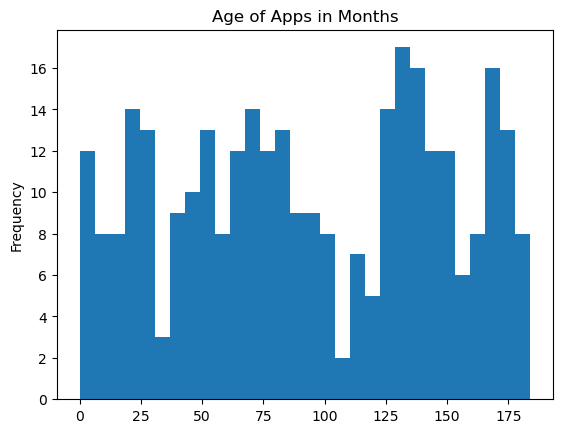

In [164]:
# plot a histogram of the age column with the title 'Age of Apps in Months'
df['age'].plot(kind='hist', title='Age of Apps in Months', bins=30) 

<Axes: title={'center': 'Age of Apps in Months'}, ylabel='Frequency'>

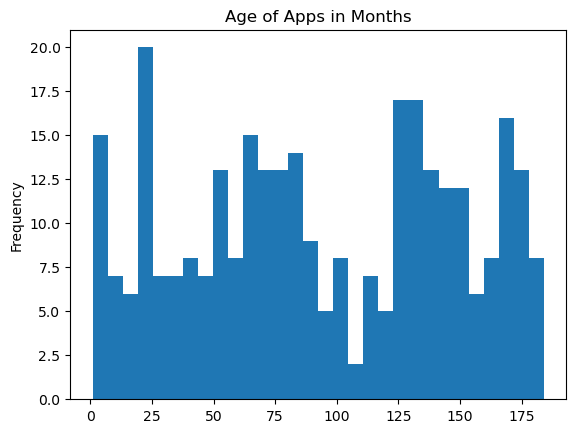

In [ ]:
# where age is less than 1, set it to 1
df['age'] = df['age'].apply(lambda x: max(x, 1)) 

# plot a histogram of the age column with the title 'Age of Apps in Months'
df['age'].plot(kind='hist', title='Age of Apps in Months', bins=30) 
  

In [169]:
# create a column called 'installsPerMonth' which is the realInstalls divided by the age
df['installsPerMonth'] = df['realInstalls'] / df['age']

<Axes: title={'center': 'Installs Per Month'}, ylabel='Frequency'>

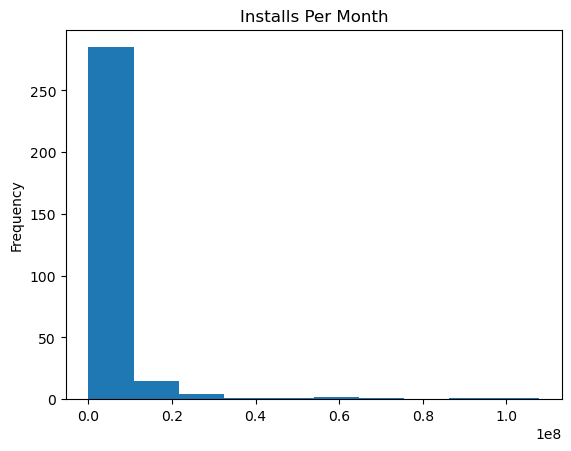

In [172]:
# plot a histogram of the installsPerMonth column with the title 'Installs Per Month'
df['installsPerMonth'].plot(kind='hist', title='Installs Per Month', bins=10)   

In [171]:
# summarize the installsPerMonth column
print(df['installsPerMonth'].describe())

count    3.110000e+02
mean     3.804367e+06
std      1.148877e+07
min      2.200000e+00
25%      4.314031e+04
50%      3.295232e+05
75%      2.373079e+06
max      1.079187e+08
Name: installsPerMonth, dtype: float64


In [173]:
# make a csv of the DataFrame
df.to_csv('google_play_apps.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)    